<a href="https://colab.research.google.com/github/krisibraynova01/Thesis_TechnicalUnifersityofSofia_Master/blob/main/SupplyChain_predict_sales2016_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score
import scipy.stats as stats
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression


In [19]:
df = pd.read_csv("SupplyChain_preprocessed.csv")

<ipython-input-19-ca8d0b4c8251>:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("SupplyChain_preprocessed.csv")


In [20]:
df['order_year'] = pd.DatetimeIndex(df['Order Date']).year

In [21]:
df.drop(["Product Category Id", "Product Card Id", "Order Item Id", "Order Item Cardprod Id", "Order Id", "Order Customer Id", "Department Id", "Customer Id", "Category Id", "Type", "Product Status", "Product Image", "Order Date", "Shipping Date"],axis=1,inplace=True)

In [22]:
sales_2016_2017 = df[(df['order_year'] == 2016) | (df['order_year'] == 2017)]

In [23]:
sales_2016_2017.shape

(115746, 35)

In [24]:
sales_2016_2017 = sales_2016_2017.apply(lambda x: x.astype('category').cat.codes if x.dtype == 'object' else x)

print(sales_2016_2017)

        Days for shipping (real)  Days for shipment (scheduled)  \
48                             5                              2   
49                             2                              2   
50                             6                              2   
51                             2                              2   
52                             3                              2   
...                          ...                            ...   
180514                         4                              4   
180515                         3                              2   
180516                         5                              4   
180517                         3                              4   
180518                         4                              4   

        Benefit per order  Sales per customer  Delivery Status  \
48             -30.750000          115.180000                1   
49            -122.730003           79.180000                3 

In [25]:
X_train = sales_2016_2017[sales_2016_2017['order_year'] == 2016].drop(columns=['Sales', 'order_year', 'Late_delivery_risk'])  # Drop 'sales' and 'year' columns
y_train = sales_2016_2017[sales_2016_2017['order_year'] == 2016]['Sales']
X_test = sales_2016_2017[sales_2016_2017['order_year'] == 2017].drop(columns=['Sales', 'order_year', 'Late_delivery_risk'])  # Drop 'sales' and 'year' columns
y_test = sales_2016_2017[sales_2016_2017['order_year'] == 2017]['Sales']

In [26]:
model = LinearRegression()

In [27]:
model.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = model.predict(X_test)

In [33]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 2.4548550387817247e-06
Mean Absolute Error: 0.0006091565358347028
R-squared: 0.9999999999150904


In [34]:
comparison_df = pd.DataFrame({
    'Actual Sales': y_test,
    'Predicted Sales': y_pred,
    'Difference': y_test - y_pred
})

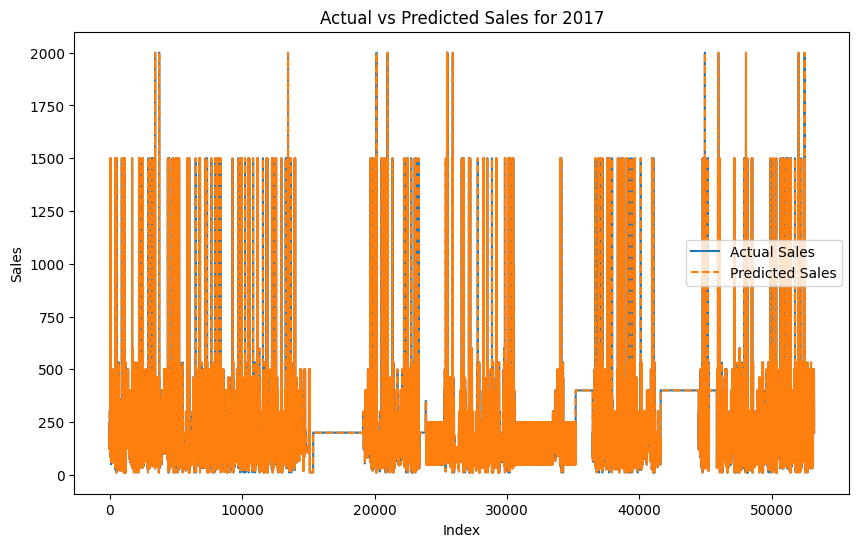

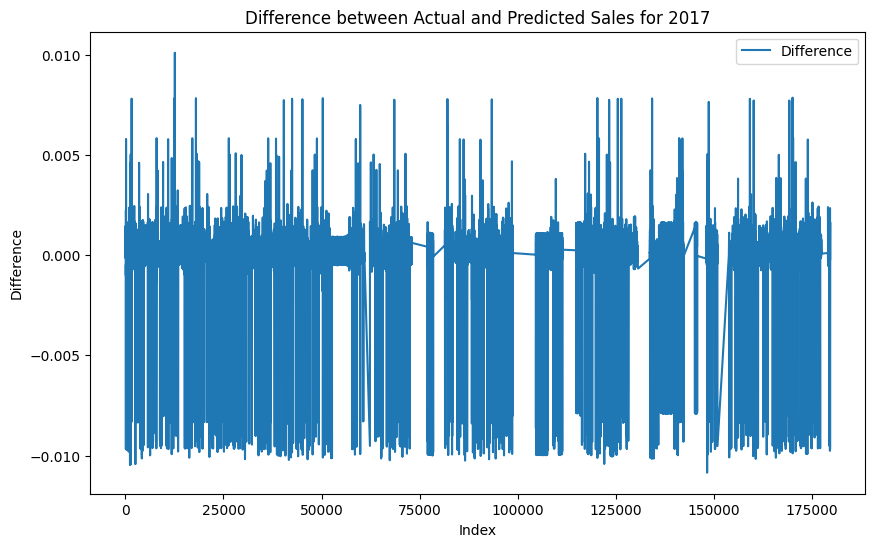

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Sales')
plt.plot(y_pred, label='Predicted Sales', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales for 2017')
plt.legend()
plt.show()

# Plotting the differences
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Difference'], label='Difference')
plt.xlabel('Index')
plt.ylabel('Difference')
plt.title('Difference between Actual and Predicted Sales for 2017')
plt.legend()
plt.show()

In [36]:
print(y_test-y_pred)

64        0.000277
65        0.001460
67        0.000149
69        0.000290
70       -0.000033
            ...   
179625    0.000919
179626    0.001008
179627    0.001076
179628    0.001644
179629   -0.000198
Name: Sales, Length: 53196, dtype: float64
